# Question 8

Using the data from Question 5, write code the analyze the data and answer the following questions Note -
1. Draw plots to demonstrate the analysis for the following questions and better visualizations
2. Write code comments wherever required for code understanding

    Insights to be drawn -
    ● Get all the overall ratings for each season and using plots compare the ratings for all the
    seasons, like season 1 ratings, season 
    2, and so on.
    ● Get all the episode names, whose average rating is more than 8 for every season
    ● Get all the episode names that aired before May 2019
    ● Get the episode name from each season with the highest and lowest rating
    ● Get the summary for the most popular ( ratings ) episode in every season

In [3]:
# importing neccesary libraries
import numpy as np   # for numerical calculation
import pandas as pd         # for reading dataset and analysis
import matplotlib.pyplot as plt  # for visualization
import seaborn as sns    # for visualization

In [4]:
df=pd.read_csv('westworld_episodes.csv')   # read csv file
df.head()   # read ist 5 rows

,id,url,name,season number,episode number,type,airdate,airtime,runtime,average rating,summary,medium image link,original image link
0,869671,https://www.tvmaze.com/episodes/869671/westwor...,The Original,1,1,regular,2016-10-02,21:00,68,8.0,A woman named Dolores is a free spirit in the ...,https://static.tvmaze.com/uploads/images/mediu...,https://static.tvmaze.com/uploads/images/origi...
1,911201,https://www.tvmaze.com/episodes/911201/westwor...,Chestnut,1,2,regular,2016-10-09,21:00,60,7.7,Bernard suspects that someone is sabotaging th...,https://static.tvmaze.com/uploads/images/mediu...,https://static.tvmaze.com/uploads/images/origi...
2,911204,https://www.tvmaze.com/episodes/911204/westwor...,The Stray,1,3,regular,2016-10-16,21:00,60,7.6,Bernard continues to investigate Dolores' supp...,https://static.tvmaze.com/uploads/images/mediu...,https://static.tvmaze.com/uploads/images/origi...
3,911205,https://www.tvmaze.com/episodes/911205/westwor...,Dissonance Theory,1,4,regular,2016-10-23,21:00,60,7.9,While Dolores joins William and Logan on their...,https://static.tvmaze.com/uploads/images/mediu...,https://static.tvmaze.com/uploads/images/origi...
4,927174,https://www.tvmaze.com/episodes/927174/westwor...,Contrapasso,1,5,regular,2016-10-30,21:00,60,8.0,Dolores takes the first step on her path of di...,https://static.tvmaze.com/uploads/images/mediu...,https://static.tvmaze.com/uploads/images/origi...


In [5]:
df.shape  # get shape in form of rows and columns (features)

(36, 13)

In [6]:
df.info()    # get information of the data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   36 non-null     int64  
 1   url                  36 non-null     object 
 2   name                 36 non-null     object 
 3   season number        36 non-null     int64  
 4   episode number       36 non-null     int64  
 5   type                 36 non-null     object 
 6   airdate              36 non-null     object 
 7   airtime              36 non-null     object 
 8   runtime              36 non-null     int64  
 9   average rating       36 non-null     float64
 10  summary              36 non-null     object 
 11  medium image link    36 non-null     object 
 12  original image link  36 non-null     object 
dtypes: float64(1), int64(4), object(8)
memory usage: 3.8+ KB


In [7]:
df.isnull().sum()  # checking missing values

id                     0
url                    0
name                   0
season number          0
episode number         0
type                   0
airdate                0
airtime                0
runtime                0
average rating         0
summary                0
medium image link      0
original image link    0
dtype: int64

#### Get all the overall ratings for each season and using plots compare the ratings for all the seasons, like season 1 ratings, season 2, and so on.

In [9]:
df['season number'].unique()  # checking unique values

array([1, 2, 3, 4], dtype=int64)

In [10]:
# Group the data by season and calculate the average overall ratings
average_ratings = df.groupby('season number')['average rating'].mean().reset_index()

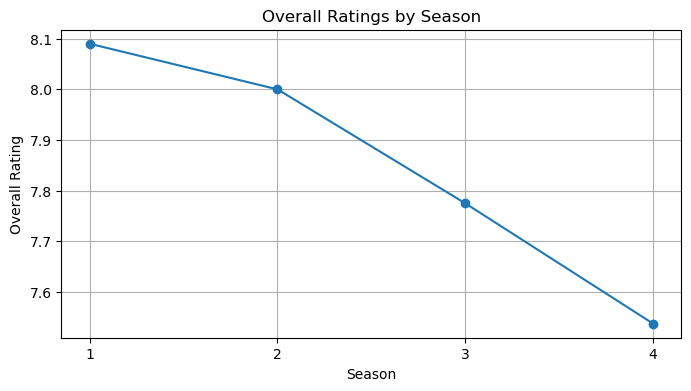

In [11]:
plt.figure(figsize=(8, 4))             # Line Plot of the ratings for all the seasons
plt.plot(average_ratings['season number'], average_ratings['average rating'], marker='o')
plt.xlabel('Season')
plt.ylabel('Overall Rating')
plt.title('Overall Ratings by Season')
plt.xticks(average_ratings['season number'])
plt.grid(True)
plt.show()

In [12]:
average_ratings

,season number,average rating
0,1,8.0900
1,2,8.0000
2,3,7.7750
3,4,7.5375


#### Get all the episode names, whose average rating is more than 8 for every season

In [14]:
# Filter the episodes by average rating of more than 8 for every season
rating_more_than_8 = df[df['average rating'] > 8]

In [15]:
rating_more_than_8[['name','season number','average rating']]   

,name,season number,average rating
6,Trompe L'Oeil,1,8.6
8,The Well-Tempered Clavier,1,8.5
9,The Bicameral Mind,1,8.7
17,Kiksuya,2,8.7
18,Vanishing Point,2,8.4
19,The Passenger,2,8.5


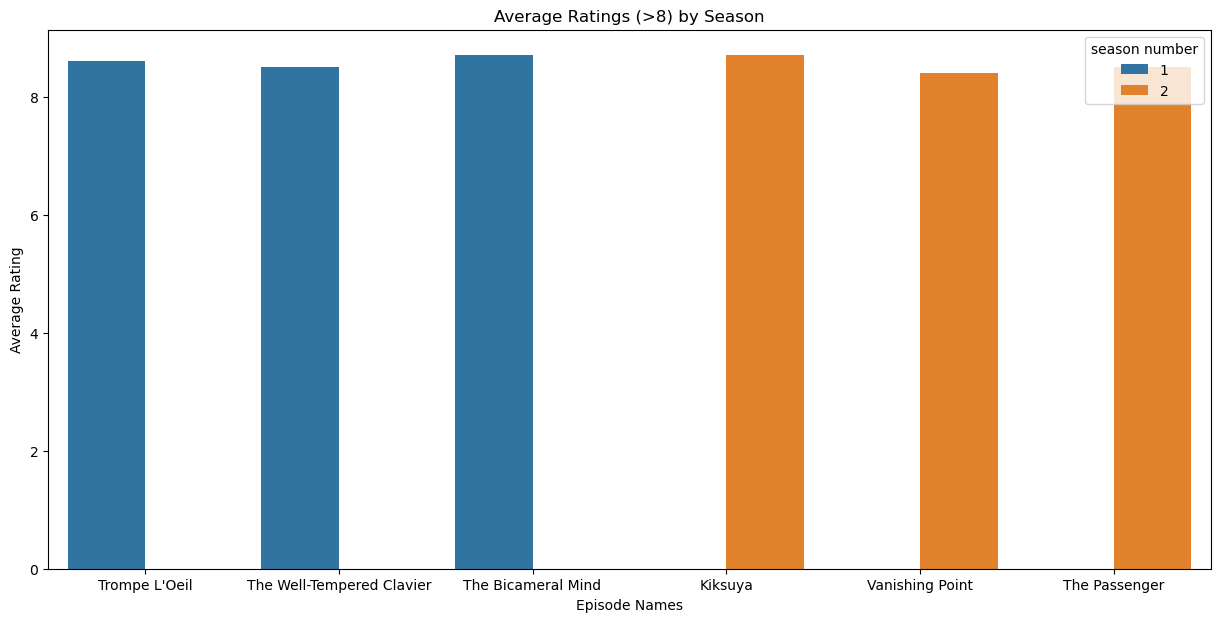

In [16]:
# Create a bar plot of average ratings by season

plt.figure(figsize=(15, 7))
sns.barplot(x=rating_more_than_8['name'], y=rating_more_than_8['average rating'], hue=rating_more_than_8['season number'])
plt.xlabel('Episode Names')
plt.ylabel('Average Rating')
plt.title('Average Ratings (>8) by Season')
plt.show()

####  Get all the episode names that aired before May 2019

In [18]:
# Convert airdate column from string to datetime format 
df['airdate'] = pd.to_datetime(df['airdate'])

In [19]:
# Filter out the episodes aired before May 2019
episodes_before_may_2019 = df[df['airdate'] < pd.to_datetime('2019-05-01')]

In [20]:
episodes_before_may_2019

,id,url,name,season number,episode number,type,airdate,airtime,runtime,average rating,summary,medium image link,original image link
0,869671,https://www.tvmaze.com/episodes/869671/westwor...,The Original,1,1,regular,2016-10-02,21:00,68,8.0,A woman named Dolores is a free spirit in the ...,https://static.tvmaze.com/uploads/images/mediu...,https://static.tvmaze.com/uploads/images/origi...
1,911201,https://www.tvmaze.com/episodes/911201/westwor...,Chestnut,1,2,regular,2016-10-09,21:00,60,7.7,Bernard suspects that someone is sabotaging th...,https://static.tvmaze.com/uploads/images/mediu...,https://static.tvmaze.com/uploads/images/origi...
2,911204,https://www.tvmaze.com/episodes/911204/westwor...,The Stray,1,3,regular,2016-10-16,21:00,60,7.6,Bernard continues to investigate Dolores' supp...,https://static.tvmaze.com/uploads/images/mediu...,https://static.tvmaze.com/uploads/images/origi...
3,911205,https://www.tvmaze.com/episodes/911205/westwor...,Dissonance Theory,1,4,regular,2016-10-23,21:00,60,7.9,While Dolores joins William and Logan on their...,https://static.tvmaze.com/uploads/images/mediu...,https://static.tvmaze.com/uploads/images/origi...
4,927174,https://www.tvmaze.com/episodes/927174/westwor...,Contrapasso,1,5,regular,2016-10-30,21:00,60,8.0,Dolores takes the first step on her path of di...,https://static.tvmaze.com/uploads/images/mediu...,https://static.tvmaze.com/uploads/images/origi...
5,932057,https://www.tvmaze.com/episodes/932057/westwor...,The Adversary,1,6,regular,2016-11-06,21:00,60,8.0,"While Maeve convinces Felix to show her ""upsta...",https://static.tvmaze.com/uploads/images/mediu...,https://static.tvmaze.com/uploads/images/origi...
6,938404,https://www.tvmaze.com/episodes/938404/westwor...,Trompe L'Oeil,1,7,regular,2016-11-13,21:00,60,8.6,While William and Dolores travel to the unclai...,https://static.tvmaze.com/uploads/images/mediu...,https://static.tvmaze.com/uploads/images/origi...
7,943065,https://www.tvmaze.com/episodes/943065/westwor...,Trace Decay,1,8,regular,2016-11-20,21:00,60,7.9,Bernard tries to cope with what he did under R...,https://static.tvmaze.com/uploads/images/mediu...,https://static.tvmaze.com/uploads/images/origi...
8,943066,https://www.tvmaze.com/episodes/943066/westwor...,The Well-Tempered Clavier,1,9,regular,2016-11-27,21:00,60,8.5,Bernard forces Robert to take him back into hi...,https://static.tvmaze.com/uploads/images/mediu...,https://static.tvmaze.com/uploads/images/origi...
9,943067,https://www.tvmaze.com/episodes/943067/westwor...,The Bicameral Mind,1,10,regular,2016-12-04,21:00,90,8.7,Delores finds out the truth about William's fa...,https://static.tvmaze.com/uploads/images/mediu...,https://static.tvmaze.com/uploads/images/origi...


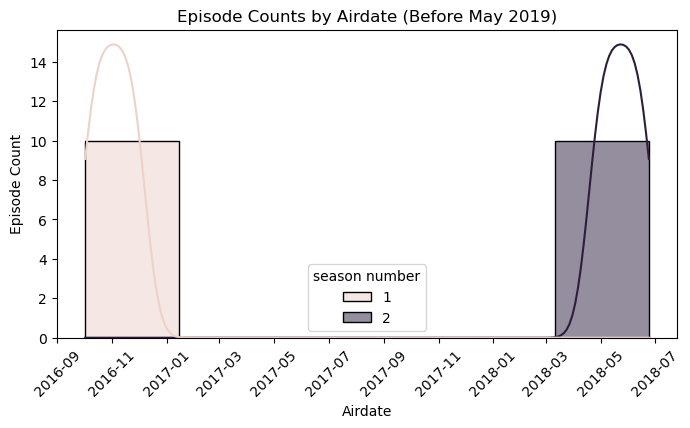

In [21]:
# Create a histogram of episode counts by airdate
plt.figure(figsize=(8, 4))
sns.histplot(data=episodes_before_may_2019, x='airdate', bins='auto', kde=True, hue='season number')
plt.xlabel('Airdate')
plt.ylabel('Episode Count')
plt.title('Episode Counts by Airdate (Before May 2019)')
plt.xticks(rotation=45)
plt.show()

#### Get the episode name from each season with the highest and lowest rating

In [23]:
# Group the episodes by season and find the episode name with the highest rating
highest_rating_episodes = df.loc[df.groupby('season number')['average rating'].idxmax()]

# Group the episodes by season and find the episode name with the lowest rating
lowest_rating_episodes = df.loc[df.groupby('season number')['average rating'].idxmin()]

In [24]:
# find the highest rating per season
highest_rating = df.groupby('season number')['average rating'].max()
highest_rating

season number
1    8.7
2    8.7
3    8.0
4    7.8
Name: average rating, dtype: float64

In [25]:
# find the lowest rating per season
lowest_rating = df.groupby('season number')['average rating'].min()
lowest_rating

season number
1    7.6
2    7.6
3    7.5
4    7.1
Name: average rating, dtype: float64

In [26]:
highest_rating_episodes

,id,url,name,season number,episode number,type,airdate,airtime,runtime,average rating,summary,medium image link,original image link
9,943067,https://www.tvmaze.com/episodes/943067/westwor...,The Bicameral Mind,1,10,regular,2016-12-04,21:00,90,8.7,Delores finds out the truth about William's fa...,https://static.tvmaze.com/uploads/images/mediu...,https://static.tvmaze.com/uploads/images/origi...
17,1459788,https://www.tvmaze.com/episodes/1459788/westwo...,Kiksuya,2,8,regular,2018-06-10,21:00,60,8.7,Another of Westworld's Host revolutionaries is...,https://static.tvmaze.com/uploads/images/mediu...,https://static.tvmaze.com/uploads/images/origi...
20,1789333,https://www.tvmaze.com/episodes/1789333/westwo...,Parce Domine,3,1,regular,2020-03-15,21:00,70,8.0,"If you're stuck in a loop, try walking in a st...",https://static.tvmaze.com/uploads/images/mediu...,https://static.tvmaze.com/uploads/images/origi...
32,2326658,https://www.tvmaze.com/episodes/2326658/westwo...,Zhuangzi,4,5,regular,2022-07-24,21:00,60,7.8,God is bored.,https://static.tvmaze.com/uploads/images/mediu...,https://static.tvmaze.com/uploads/images/origi...


In [27]:
lowest_rating_episodes

,id,url,name,season number,episode number,type,airdate,airtime,runtime,average rating,summary,medium image link,original image link
2,911204,https://www.tvmaze.com/episodes/911204/westwor...,The Stray,1,3,regular,2016-10-16,21:00,60,7.6,Bernard continues to investigate Dolores' supp...,https://static.tvmaze.com/uploads/images/mediu...,https://static.tvmaze.com/uploads/images/origi...
14,1446362,https://www.tvmaze.com/episodes/1446362/westwo...,Akane No Mai,2,5,regular,2018-05-20,21:00,60,7.6,While Maeve and her people explore Shogun Worl...,https://static.tvmaze.com/uploads/images/mediu...,https://static.tvmaze.com/uploads/images/origi...
25,1829375,https://www.tvmaze.com/episodes/1829375/westwo...,Decoherence,3,6,regular,2020-04-19,21:00,60,7.5,Do a lot of people tell you that you need ther...,https://static.tvmaze.com/uploads/images/mediu...,https://static.tvmaze.com/uploads/images/origi...
28,2326389,https://www.tvmaze.com/episodes/2326389/westwo...,The Auguries,4,1,regular,2022-06-26,21:00,55,7.1,Hello again. Don't worry about a thing. It's a...,https://static.tvmaze.com/uploads/images/mediu...,https://static.tvmaze.com/uploads/images/origi...


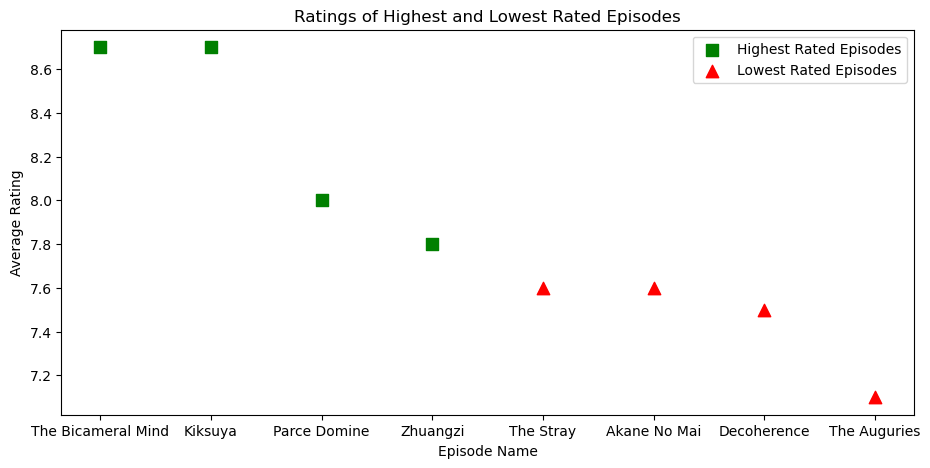

In [28]:
# Create scatter plots
plt.figure(figsize=(11, 5))

# Scatter plot for highest rated episodes
plt.scatter(highest_rating_episodes['name'], highest_rating_episodes['average rating'],
            color='green', label='Highest Rated Episodes', marker='s', s=80)

# Scatter plot for lowest rated episodes
plt.scatter(lowest_rating_episodes['name'], lowest_rating_episodes['average rating'],
            color='red', label='Lowest Rated Episodes', marker='^', s=80)

# Set plot title and labels
plt.title('Ratings of Highest and Lowest Rated Episodes')
plt.xlabel('Episode Name')
plt.ylabel('Average Rating')

# Add legend
plt.legend()

# Show the plot
plt.show()

#### Get the summary for the most popular ( ratings ) episode in every season

In [30]:
# Summary for most popular episode in every season
highest_rating_episodes[['season number', 'name', 'summary']]

,season number,name,summary
9,1,The Bicameral Mind,Delores finds out the truth about William's fa...
17,2,Kiksuya,Another of Westworld's Host revolutionaries is...
20,3,Parce Domine,"If you're stuck in a loop, try walking in a st..."
32,4,Zhuangzi,God is bored.


In [31]:
for i,summary in enumerate(highest_rating_episodes['summary']):  # Get the summary for the most popular ( ratings ) episode 
    print("Season number: ",i+1)
    print("Summary: ",summary)
    print()

Season number:  1
Summary:  Delores finds out the truth about William's fate. Meanwhile, Maeve organizes an escape plan, only to discover that someone else is pulling the strings. And Robert plays the final piece in his grand narrative.

Season number:  2
Summary:  Another of Westworld's Host revolutionaries is revealed. Meanwhile, Emily finds the Man and convinces the Ghost Nation to hand him over to her to ensure his suffering.

Season number:  3
Summary:  If you're stuck in a loop, try walking in a straight line.

Season number:  4
Summary:  God is bored.

